# Time series values for Vatnsendi pumpstation

In [437]:
import matplotlib.pyplot as plt
import pandas as pd

In [438]:
specific_day = "2024-08-08"

In [439]:
df_pressure_1 = pd.read_excel("data/H-KOP-VE-ÞS212.xlsx")
df_pressure_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_pressure_2 = pd.read_excel("data/H-KOP-VE-ÞS213.xlsx")
df_pressure_2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

In [440]:
df_pressure_1.head()

,start_time,value
0,2022-03-14 23:00:00,9.0
1,2022-03-13 16:00:00,9.0
2,2022-03-08 02:00:00,9.0
3,2022-03-08 03:00:00,9.0
4,2022-03-13 18:00:00,9.0


In [441]:
df_pressure_2.head()

,start_time,value
0,2022-03-14 23:00:00,5.60
1,2022-03-13 16:00:00,5.55
2,2022-03-08 02:00:00,5.56
3,2022-03-08 03:00:00,5.56
4,2022-03-13 18:00:00,5.63


In [442]:
# Convert 'start_time' to datetime format
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
# specific_day = "2024-11-09"
# specific_day = "2024-08-08"

df_specific_day = df_pressure_1[df_pressure_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-08-08 01:00:00,9.01,1.001014
2024-08-08 02:00:00,9.00,0.999903
2024-08-08 03:00:00,9.00,0.999903
2024-08-08 04:00:00,8.99,0.998792
2024-08-08 05:00:00,8.99,0.998792
2024-08-08 06:00:00,8.99,0.998792
2024-08-08 07:00:00,9.00,0.999903
2024-08-08 08:00:00,9.01,1.001014
2024-08-08 09:00:00,9.00,0.999903


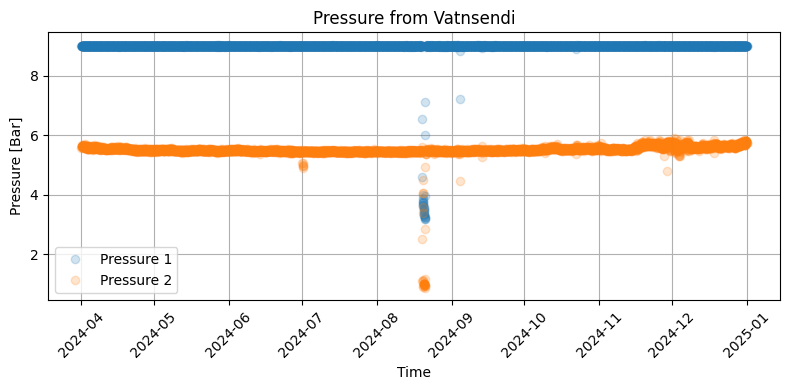

In [443]:
# Convert 'start_time' to datetime format for both DataFrames
df_pressure_1['start_time'] = pd.to_datetime(df_pressure_1['start_time'], errors='coerce')
df_pressure_2['start_time'] = pd.to_datetime(df_pressure_2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
df_filtered_1 = df_pressure_1[(df_pressure_1['start_time'].dt.year == 2024) & (df_pressure_1['start_time'].dt.month > 3)]
df_filtered_2 = df_pressure_2[(df_pressure_2['start_time'].dt.year == 2024) & (df_pressure_2['start_time'].dt.month > 3)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_pressure_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 1')  # Alpha controls opacity

# Plot pressure_2 from df_pressure_2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.2, label='Pressure 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Pressure [Bar]')
plt.title('Pressure from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [444]:
df_flow_1 = pd.read_excel("data/H-KOP-VE-RS212.xlsx")
df_flow_1.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)
df_flow2 = pd.read_excel("data/H-KOP-VE-RS213.xlsx")
df_flow2.drop(columns=["mpoint_id","mpoint_name","aggregate_name","aggregate_id","flag","quality_description","event_time"],inplace=True)

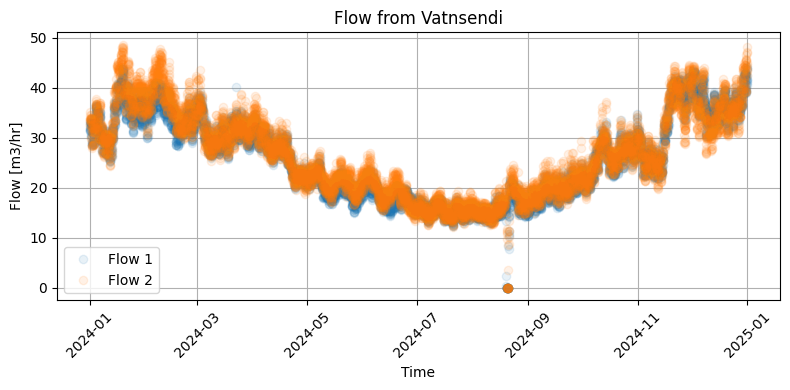

In [445]:
# Convert 'start_time' to datetime format for both DataFrames
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for July 2024 in both DataFrames
# df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) & (df_flow_1['start_time'].dt.month == 3)]
# df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024) & (df_flow2['start_time'].dt.month == 3)]

df_filtered_1 = df_flow_1[(df_flow_1['start_time'].dt.year == 2024) ]
df_filtered_2 = df_flow2[(df_flow2['start_time'].dt.year == 2024)]

# Create a figure
plt.figure(figsize=(8, 4))

# Plot pressure_1 from df_flow_1
plt.plot(df_filtered_1['start_time'], df_filtered_1['value'], marker='o', linestyle='', alpha=0.1, label='Flow 1')  # Alpha controls opacity

# Plot pressure_2 from df_flow2
plt.plot(df_filtered_2['start_time'], df_filtered_2['value'], marker='o', linestyle='', alpha=0.1, label='Flow 2')  # Alpha controls opacity

# Customize plot
plt.xlabel('Time')
plt.ylabel('Flow [m3/hr]')
plt.title('Flow from Vatnsendi')  # Update the title
plt.grid(True)
plt.xticks(rotation=45)
# plt.ylim([7.7, 8])  # Set y-range from 7.7 to 8 (adjust as needed)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


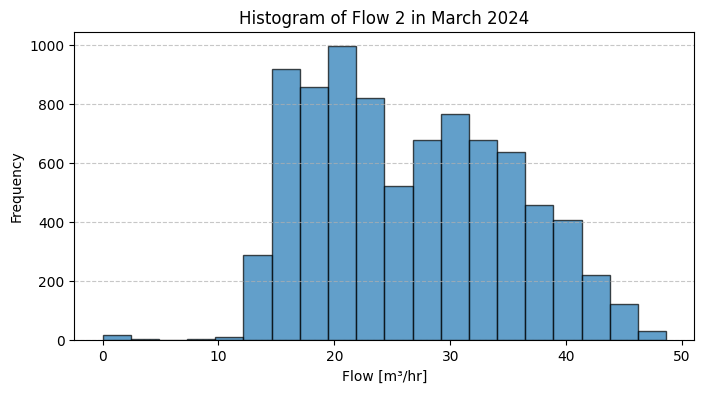

In [446]:
import matplotlib.pyplot as plt

# Create a histogram for Flow 2 values
plt.figure(figsize=(8, 4))
plt.hist(df_filtered_2['value'], bins=20, edgecolor='black', alpha=0.7)

# Customize plot
plt.xlabel('Flow [m³/hr]')
plt.ylabel('Frequency')
plt.title('Histogram of Flow 2 in March 2024')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [447]:
# Convert 'start_time' to datetime format
df_flow_1['start_time'] = pd.to_datetime(df_flow_1['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
# specific_day = "2024-08-03"

df_specific_day = df_flow_1[df_flow_1['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day
print(df_specific_day)

               start_time  value
21530 2024-08-08 03:00:00  13.33
21532 2024-08-08 21:00:00  15.73
21543 2024-08-08 22:00:00  15.42
21551 2024-08-08 23:00:00  14.78
21561 2024-08-08 04:00:00  13.66
21568 2024-08-08 02:00:00  13.21
21569 2024-08-08 01:00:00  13.09
21584 2024-08-08 20:00:00  16.06
21591 2024-08-08 06:00:00  14.26
21594 2024-08-08 07:00:00  14.72
21597 2024-08-08 08:00:00  15.43
21599 2024-08-08 05:00:00  13.82
21600 2024-08-08 09:00:00  14.92
21601 2024-08-08 16:00:00  15.70
21606 2024-08-08 18:00:00  15.00
21610 2024-08-08 15:00:00  15.13
21611 2024-08-08 10:00:00  14.85
21614 2024-08-08 11:00:00  15.35
21615 2024-08-08 14:00:00  15.04
21617 2024-08-08 19:00:00  15.68
21622 2024-08-08 12:00:00  15.30
21623 2024-08-08 17:00:00  16.04
21624 2024-08-08 13:00:00  15.02


In [448]:
df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern
df_specific_day

,value,demand_pattern
start_time,,
2024-08-08 01:00:00,13.09,0.881507
2024-08-08 02:00:00,13.21,0.889588
2024-08-08 03:00:00,13.33,0.897669
2024-08-08 04:00:00,13.66,0.919892
2024-08-08 05:00:00,13.82,0.930667
2024-08-08 06:00:00,14.26,0.960297
2024-08-08 07:00:00,14.72,0.991275
2024-08-08 08:00:00,15.43,1.039088
2024-08-08 09:00:00,14.92,1.004743


In [449]:
# df_specific_day["demand_pattern"].to_csv("demand_pattern_2024-11-03",index= False)

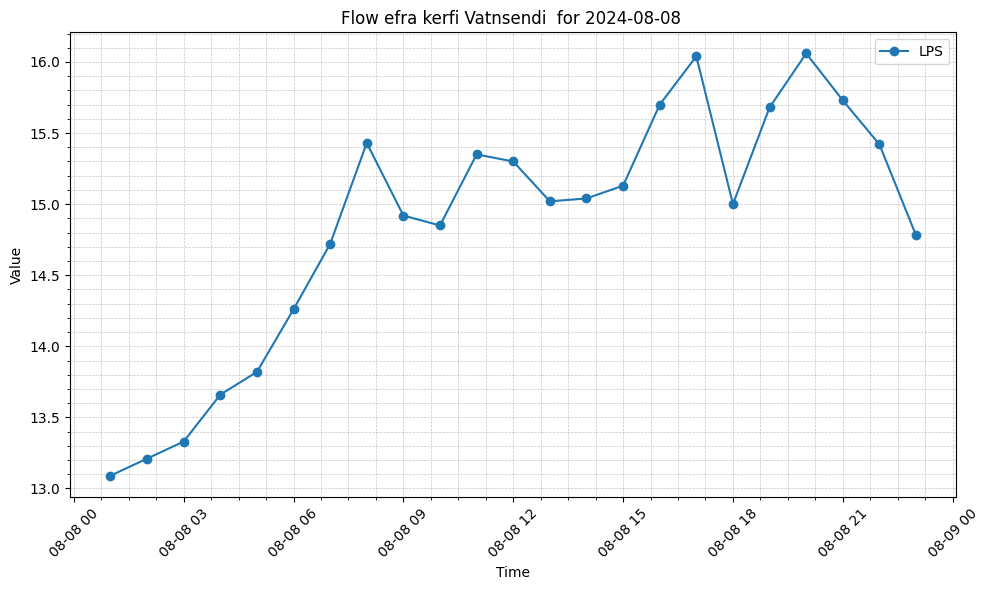

In [450]:
# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='LPS', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Flow efra kerfi Vatnsendi  for {specific_day} ')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [451]:
specific_day

'2024-08-08'

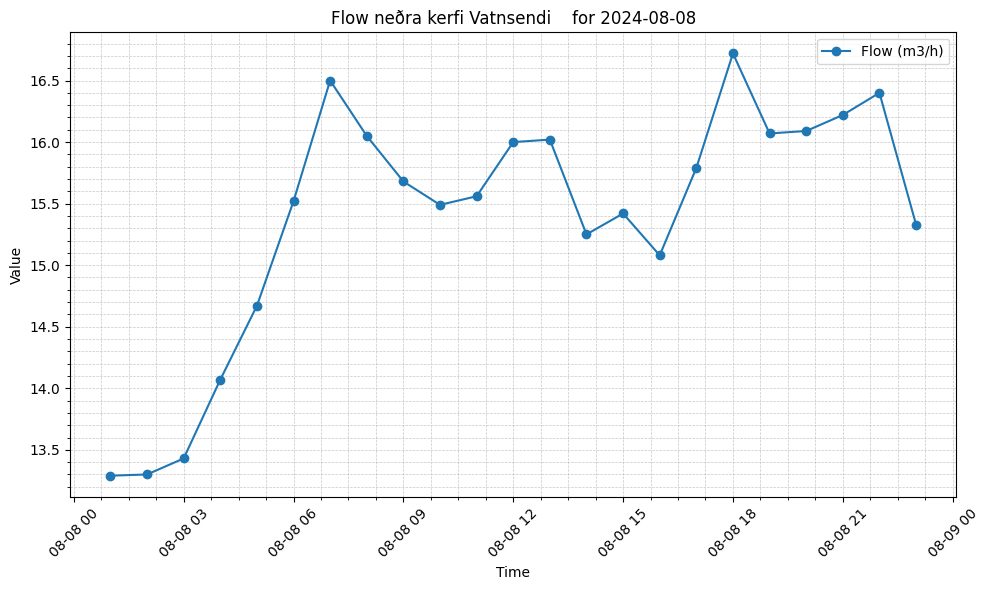

In [456]:
# Convert 'start_time' to datetime format
df_flow2['start_time'] = pd.to_datetime(df_flow2['start_time'], errors='coerce')

# Filter for a specific day (e.g., "2024-03-10")
# specific_day = "2024-11-03"

df_specific_day = df_flow2[df_flow2['start_time'].dt.date == pd.to_datetime(specific_day).date()]

# Print the filtered data for that specific day

df_specific_day.set_index('start_time', inplace=True)
df_specific_day = df_specific_day.sort_index(ascending=True)
avg_flow = df_specific_day['value'].mean()  # Sum of all flow for that day
df_specific_day['demand_pattern'] = df_specific_day['value'] / avg_flow  # Normalized demand pattern

# Plot the value and demand_pattern columns from df_specific_day
plt.figure(figsize=(10, 6))

# Plot the flow value
plt.plot(df_specific_day.index, df_specific_day['value'], label='Flow (m3/h)', color='tab:blue', marker='o')

# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Flow neðra kerfi Vatnsendi    for {specific_day}')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [453]:
df_specific_day

,value,demand_pattern
start_time,,
2024-08-08 01:00:00,13.29,0.863597
2024-08-08 02:00:00,13.30,0.864246
2024-08-08 03:00:00,13.43,0.872694
2024-08-08 04:00:00,14.07,0.914282
2024-08-08 05:00:00,14.67,0.953270
2024-08-08 06:00:00,15.52,1.008504
2024-08-08 07:00:00,16.50,1.072185
2024-08-08 08:00:00,16.05,1.042944
2024-08-08 09:00:00,15.68,1.018901


In [454]:
specific_day

'2024-08-08'

In [ ]:
# df_specific_day[['value']].to_csv('flow_values_VE_nedri.csv', index=True)
